In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("sales_data.csv")  # Ensure the file is in the same directory

# Display the first five rows
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
         Date     Store         City  Revenue Product Category  Quantity  \
0  2023-04-13   Store_2      Phoenix      321             Toys         2   
1  2024-03-11  Store_10      Houston     1513        Groceries         8   
2  2023-12-15   Store_2  Los Angeles     1821        Furniture         9   
3  2023-09-28  Store_10  Los Angeles     1312         Clothing         7   
4  2023-04-17   Store_1      Chicago      426         Clothing         3   

   Employees  Transactions  Payment Method  Discount  Customer_Age  \
0         28            17  Online Payment     13.82            27   
1          6            36  Online Payment     21.60            56   
2         26            19      Debit Card     49.02            45   
3          7            64     Credit Card      3.38            66   
4         16            91  Online Payment     25.94            53   

  Customer_Gender  
0      Non-binary  
1      Non-binary  
2      Non-binary  
3         

In [15]:
# Check for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())
df.fillna(0, inplace=True)  # Handling missing values by replacing with 0


Missing values in dataset:
Date                0
Store               0
City                0
Revenue             0
Product Category    0
Quantity            0
Employees           0
Transactions        0
Payment Method      0
Discount            0
Customer_Age        0
Customer_Gender     0
dtype: int64


In [9]:
# Handling missing values - Fill numeric columns with median, categorical with mode
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.median()))
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))

In [17]:
# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
           Revenue    Quantity   Employees  Transactions    Discount  \
count   500.000000  500.000000  500.000000    500.000000  500.000000   
mean   1021.052000    5.088000   16.922000     49.048000   24.946460   
std     554.294483    2.506955    7.251557     28.144305   14.422932   
min      51.000000    1.000000    5.000000      1.000000    0.100000   
25%     547.750000    3.000000   10.750000     25.000000   12.245000   
50%    1025.500000    5.000000   17.000000     48.500000   25.750000   
75%    1465.500000    7.000000   23.000000     74.000000   36.910000   
max    1999.000000    9.000000   29.000000     99.000000   49.940000   

       Customer_Age  
count    500.000000  
mean      43.864000  
std       14.818931  
min       18.000000  
25%       31.750000  
50%       43.000000  
75%       57.000000  
max       69.000000  


In [19]:
# Unique store and product count
num_unique_stores = df['Store'].nunique()
num_unique_products = df['Product Category'].nunique()
print(f"\nNumber of unique stores: {num_unique_stores}")
print(f"Number of unique product categories: {num_unique_products}")


Number of unique stores: 10
Number of unique product categories: 5


In [21]:
# Total transactions
total_transactions = df['Transactions'].sum()
print(f"\nTotal transactions recorded: {total_transactions}")


Total transactions recorded: 24524


In [23]:
# Store location with highest total sales revenue
top_store = df.groupby('Store')['Revenue'].sum().idxmax()
print(f"Store with the highest total sales revenue: {top_store}")

Store with the highest total sales revenue: Store_10


In [25]:
# Top 5 cities in total sales
top_cities = df.groupby('City')['Revenue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 cities by total sales:")
print(top_cities)


Top 5 cities by total sales:
City
Chicago        107678
New York       106089
Los Angeles    104965
Phoenix         98623
Houston         93171
Name: Revenue, dtype: int64


In [27]:
# Most sold product category
most_sold_product = df.groupby('Product Category')['Quantity'].sum().idxmax()
print(f"\nMost sold product category: {most_sold_product}")


Most sold product category: Clothing


In [29]:
# Store with highest average transaction value
store_avg_transaction = df.groupby('Store')['Revenue'].mean().idxmax()
print(f"\nStore with highest average transaction value: {store_avg_transaction}")


Store with highest average transaction value: Store_6


In [31]:
# Total revenue per store
store_revenue = df.groupby('Store')['Revenue'].sum()
print("\nTotal revenue generated by each store:")
print(store_revenue)


Total revenue generated by each store:
Store
Store_1     61734
Store_10    78093
Store_2     46645
Store_3     48520
Store_4     39991
Store_5     64218
Store_6     51657
Store_7     45679
Store_8     35540
Store_9     38449
Name: Revenue, dtype: int64


In [33]:
# Stores with lowest revenue
low_revenue_stores = store_revenue.nsmallest(3)
print("\nStores with the lowest total revenue:")
print(low_revenue_stores)


Stores with the lowest total revenue:
Store
Store_8    35540
Store_9    38449
Store_4    39991
Name: Revenue, dtype: int64


In [35]:
# Revenue per employee
df['Revenue per Employee'] = df['Revenue'] / df['Employees']
print("\nRevenue generated per employee for each store:")
print(df.groupby('Store')['Revenue per Employee'].mean())


Revenue generated per employee for each store:
Store
Store_1     84.610262
Store_10    91.532599
Store_2     68.773776
Store_3     66.650992
Store_4     73.324313
Store_5     82.693898
Store_6     92.283304
Store_7     78.522559
Store_8     63.516123
Store_9     62.262245
Name: Revenue per Employee, dtype: float64


In [37]:
# City with the highest number of transactions
top_city_transactions = df.groupby('City')['Transactions'].sum().idxmax()
print(f"\nCity with the highest number of transactions: {top_city_transactions}")


City with the highest number of transactions: Chicago


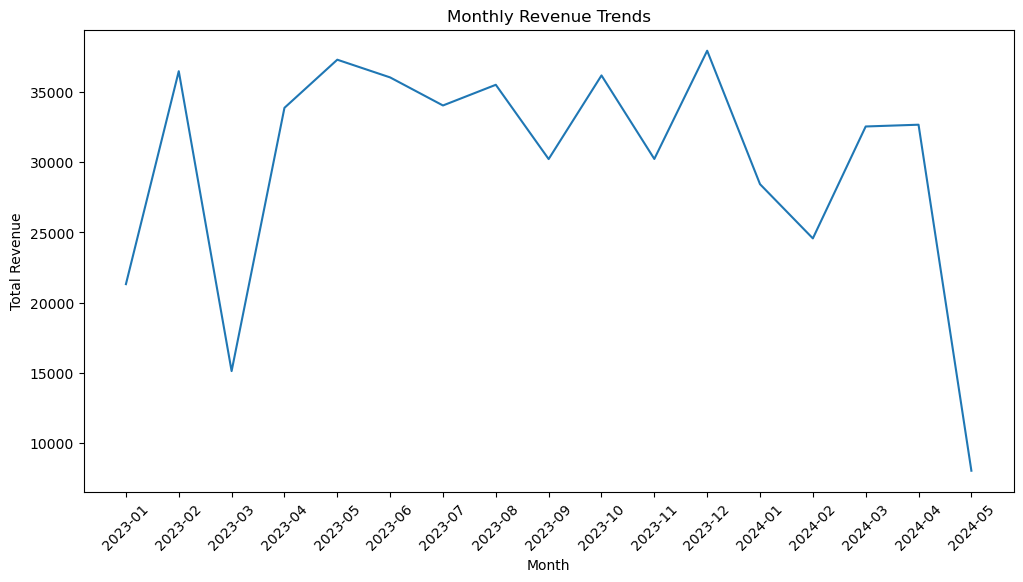

In [39]:
# Revenue trends over time
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

In [41]:
# Best-selling product based on quantity
top_product = df.groupby('Product Category')['Quantity'].sum().idxmax()
print(f"\nBest-selling product based on quantity sold: {top_product}")


Best-selling product based on quantity sold: Clothing


In [43]:
# Store with the highest number of transactions
top_store_transactions = df.groupby('Store')['Transactions'].sum().idxmax()
print(f"\nStore with the highest number of transactions: {top_store_transactions}")


Store with the highest number of transactions: Store_10


In [45]:
# Average revenue per transaction
avg_revenue_per_transaction = df['Revenue'].sum() / df['Transactions'].sum()
print(f"\nAverage revenue per transaction across all stores: {avg_revenue_per_transaction:.2f}")


Average revenue per transaction across all stores: 20.82


In [47]:
# Month with highest sales
best_month = df.groupby('Month')['Revenue'].sum().idxmax()
print(f"\nMonth with the highest sales: {best_month}")


Month with the highest sales: 2023-12


In [49]:
# Day of the week with highest sales
df['Day_of_Week'] = df['Date'].dt.day_name()
best_day = df.groupby('Day_of_Week')['Revenue'].sum().idxmax()
print(f"\nDay of the week with highest sales: {best_day}")


Day of the week with highest sales: Monday


In [51]:
# Compare sales between weekdays and weekends
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])
weekday_vs_weekend = df.groupby('Is_Weekend')['Revenue'].sum()
print("\nSales comparison between weekdays and weekends:")
print(weekday_vs_weekend)


Sales comparison between weekdays and weekends:
Is_Weekend
False    352375
True     158151
Name: Revenue, dtype: int64


In [53]:
# Revenue by payment method
payment_revenue = df.groupby('Payment Method')['Revenue'].sum()
print("\nTotal revenue based on different payment methods:")
print(payment_revenue)


Total revenue based on different payment methods:
Payment Method
Cash              130059
Credit Card       141408
Debit Card        104139
Online Payment    134920
Name: Revenue, dtype: int64


In [55]:
# Correlation between discounts and revenue
correlation = df[['Discount', 'Revenue']].corr()
print("\nCorrelation between discounts and revenue:")
print(correlation)


Correlation between discounts and revenue:
          Discount   Revenue
Discount  1.000000  0.033525
Revenue   0.033525  1.000000


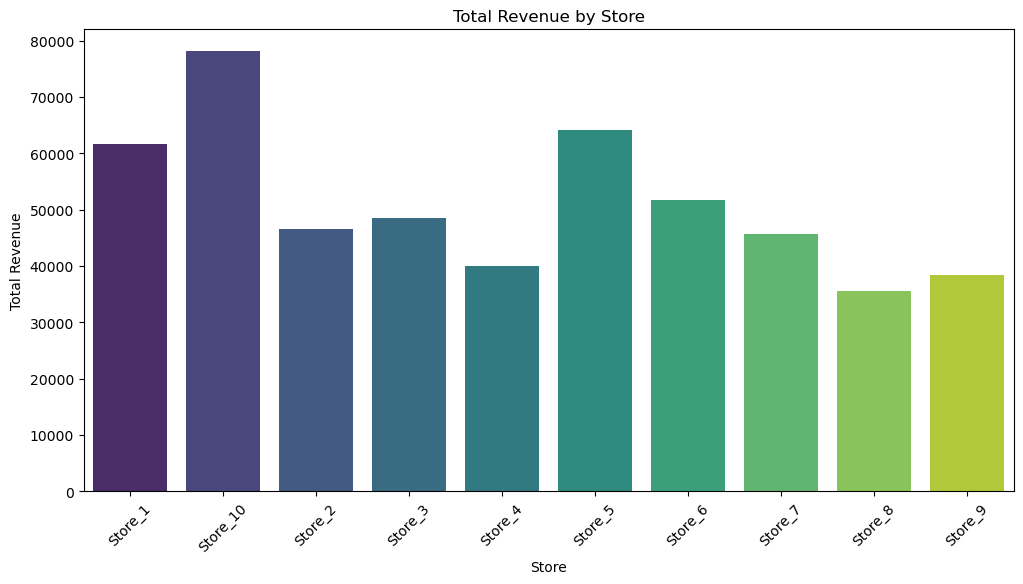

In [69]:
# Visualization - Revenue by store
plt.figure(figsize=(12, 6))
sns.barplot(x=store_revenue.index, y=store_revenue.values, palette='viridis', hue=store_revenue.index, legend=False)
plt.xticks(rotation=45)
plt.title("Total Revenue by Store")
plt.xlabel("Store")
plt.ylabel("Total Revenue")
plt.show()

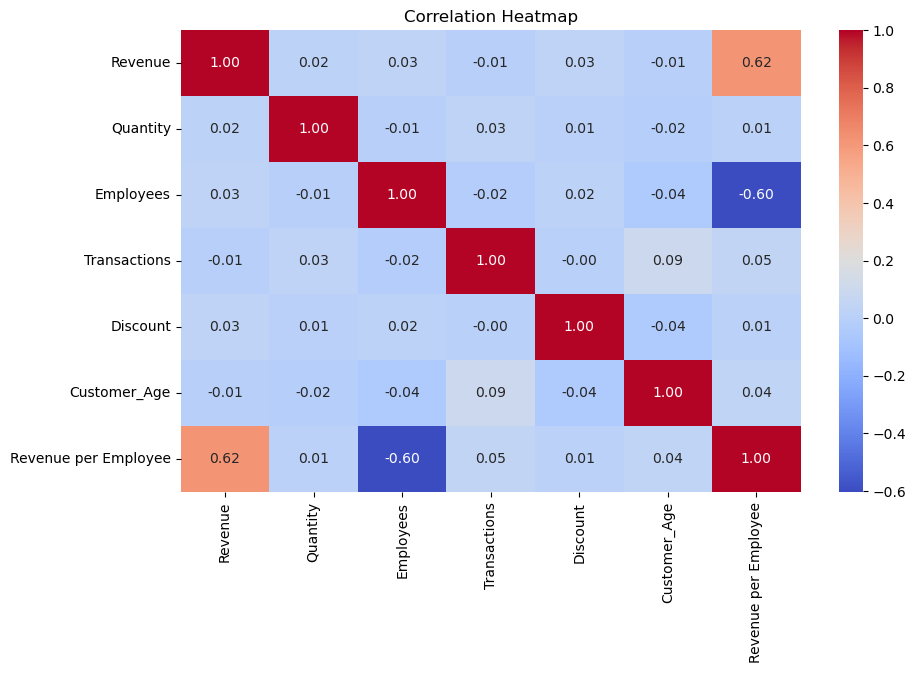

In [63]:
# Heatmap - Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

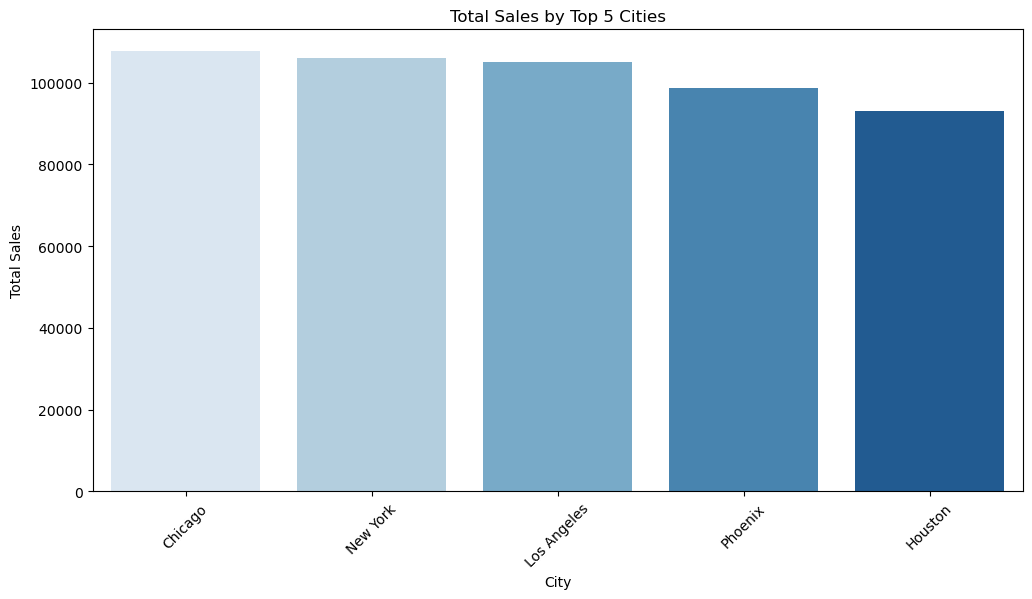


Analysis completed successfully!


In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, palette='Blues', legend=False)
plt.xticks(rotation=45)
plt.title("Total Sales by Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

print("\nAnalysis completed successfully!")